<a href="https://colab.research.google.com/github/Aditic1/Handwritten-/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and import libraries

In [5]:
!pip install tensorflow
!pip install opencv-python

In [6]:
import tensorflow as tf

# Loading the dataset
Tensorflow already contains MNIST dataset

In [7]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

# Plotting an example here

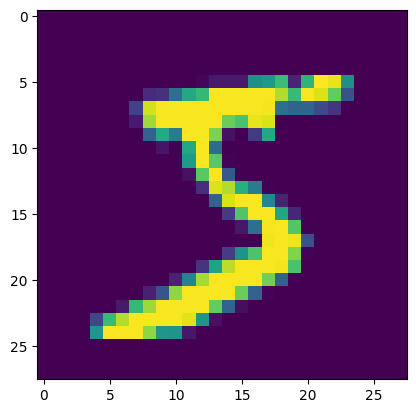

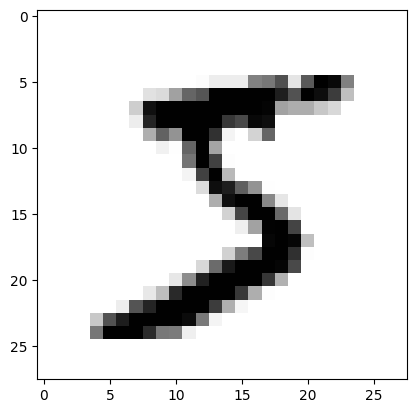

In [9]:
plt.imshow(x_train[0])
plt.show()

#now change to binary
#This is reverted coloured-picture. The background which is black is reverted to white and vice-versa
plt.imshow(x_train[0],cmap=plt.cm.binary)

# Normalization of images
Changes range of pixel values to bring image to a range that is normal to sense

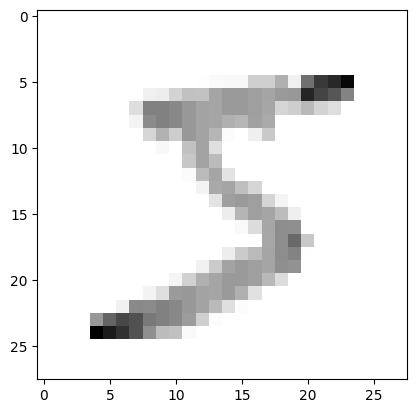

In [10]:
# Normalize each individual image separately
#Done by division by 255
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

# Plot the first image in the normalized training set
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
x_train[0]
#After normalization, all the values will be between 0 and 1

# Resizing the image to apply convolution operation

In [13]:
import numpy as np

# Assuming x_train and x_test are lists or arrays containing grayscale image data
IMG_SIZE = 28

# Reshape the training data
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Reshape the testing data
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print("Training sample dimensions:", x_trainr.shape)
print("Testing sample dimensions:", x_testr.shape)


Training sample dimensions: (60000, 28, 28, 1)
Testing sample dimensions: (10000, 28, 28, 1)


# Creating a deep neural network

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [16]:
#creating a neural network
model = Sequential()

#First convolution Layer            28-3+1 = 26*26
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))      # activation function. Any value < 0 will be dropped while others are allowed will be passed to next/second layer
model.add(MaxPooling2D(pool_size=(2,2)))        # maxpooling. Maximum values allowed to pass, rest are dropped

#Second convolution Layer          26-3+1 = 24*24
model.add(Conv2D(64,(3,3)))       # second convolution layer
model.add(Activation("relu"))     # activation function. Any value < 0 will be dropped while others are allowed will be passed to next/second layer
model.add(MaxPooling2D(pool_size=(2,2)))        #maxpooling

#Third convolution Layer           24-3+1 = 22*22
model.add(Conv2D(64,(3,3)))       # Third convolution layer
model.add(Activation("relu"))     # activation function. Any value < 0 will be dropped while others are allowed will be passed to next/second layer
model.add(MaxPooling2D(pool_size=(2,2)))        #maxpooling

#Fully connected Layer 1          20*20 = 400
model.add(Flatten())              #2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))

#Fully connected Layer 2
model.add(Dense(32))
model.add(Activation("relu"))

#Last Fully connected Layer 2
model.add(Dense(10))
model.add(Activation('softmax'))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [18]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [19]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 76s 56ms/step - loss: 0.3299 - accuracy: 0.8984 - val_loss: 0.1232 - val_accuracy: 0.9618
Epoch 2/5
1313/1313 [==============================] - 69s 52ms/step - loss: 0.1042 - accuracy: 0.9683 - val_loss: 0.0919 - val_accuracy: 0.9724
Epoch 3/5
1313/1313 [==============================] - 71s 54ms/step - loss: 0.0735 - accuracy: 0.9772 - val_loss: 0.0712 - val_accuracy: 0.9786
Epoch 4/5
1313/1313 [==============================] - 72s 54ms/step - loss: 0.0574 - accuracy: 0.9822 - val_loss: 0.0761 - val_accuracy: 0.9767
Epoch 5/5
1313/1313 [==============================] - 68s 52ms/step - loss: 0.0451 - accuracy: 0.9854 - val_loss: 0.0570 - val_accuracy: 0.9837


In [20]:
test_loss,test_acc=model.evaluate(x_testr,y_test)
print("Test loss on test part of dataset",test_loss)
print("Validation accuracy",test_acc)

313/313 [==============================] - 5s 17ms/step - loss: 0.0579 - accuracy: 0.9840
Test loss on test part of dataset 0.05792485177516937
Validation accuracy 0.984000027179718


In [21]:
predictions=model.predict([x_testr])

313/313 [==============================] - 5s 14ms/step


# Example
Predicted by the model

In [22]:
print(np.argmax(predictions[90]))

3


Actual image

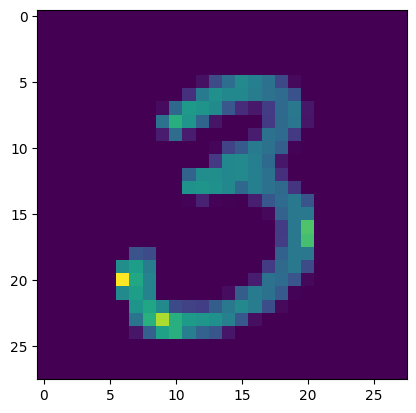

In [23]:
plt.imshow(x_test[90])

In [25]:
!pip install opencv-python

In [26]:
import cv2

In [44]:
img=cv2.imread('/content/demo.png')

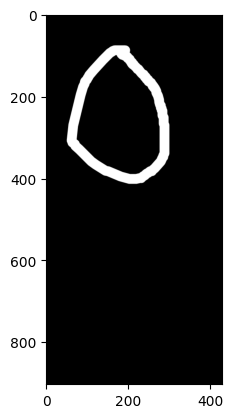

In [45]:
plt.imshow(img)

In [46]:
#convert to gray image
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#resize
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
#NORMALIZATION
normaliz=tf.keras.utils.normalize(resized,axis=1)
normaliz=np.array(normaliz).reshape(-1,IMG_SIZE,IMG_SIZE,1)
normaliz.shape

(1, 28, 28, 1)

In [47]:
predictions=np.argmax(normaliz)
print(np.argmax(predictions))

0
